In [31]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

Define fuzzy variables

In [32]:
temperature = ctrl.Antecedent(np.arange(0, 46, 0.5), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 31, 0.5), 'humidity')
duration = ctrl.Consequent(np.arange(0, 71, 1), 'duration')

# Membership
temperature['cold'] = fuzz.trapmf(temperature.universe, [0, 0,5,10])
temperature['fresh'] = fuzz.trimf(temperature.universe, [5, 12.5, 22.5])
temperature['normal'] = fuzz.trimf(temperature.universe, [15, 22.5, 27.5])
temperature['hot'] = fuzz.trimf(temperature.universe, [22.5, 30, 37.5])
temperature['very_hot'] = fuzz.trapmf(temperature.universe, [32.5, 37.5,45,45])

humidity['dry'] = fuzz.trapmf(humidity.universe, [0, 0,5, 12.5])
humidity['humid'] = fuzz.trimf(humidity.universe, [5, 12.5, 22.5])
humidity['wet'] = fuzz.trapmf(humidity.universe, [17.5,20,31, 31])

duration['short'] = fuzz.trapmf(duration.universe, [0, 0, 10,20])
duration['medium'] = fuzz.trimf(duration.universe, [10, 30, 50])
duration['long'] = fuzz.trapmf(duration.universe, [40, 50, 70,70])


View methods

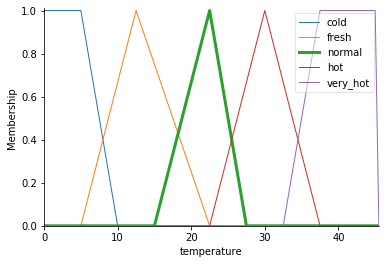

In [33]:
temperature['normal'].view()

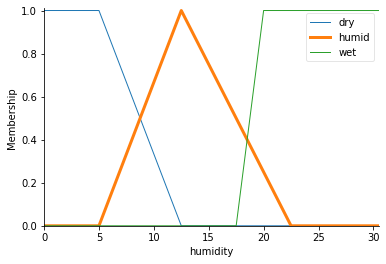

In [34]:
humidity['humid'].view()

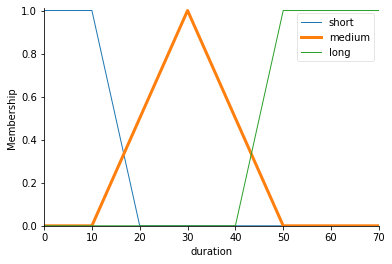

In [35]:
duration['medium'].view()

Fuzzy Rules

In [36]:
rule1 = ctrl.Rule(temperature['very_hot'] & humidity['dry'], duration['long'])
rule2 = ctrl.Rule(temperature['hot'] & humidity['dry'], duration['long'])
rule3 = ctrl.Rule(temperature['fresh'] & humidity['dry'], duration['long'])
rule4 = ctrl.Rule(temperature['normal'] & humidity['dry'], duration['long'])
rule5 = ctrl.Rule(temperature['cold'] & humidity['dry'], duration['medium'])
rule6 = ctrl.Rule(temperature['very_hot'] & humidity['humid'], duration['medium'])
rule7 = ctrl.Rule(temperature['hot'] & humidity['humid'], duration['medium'])
rule8 = ctrl.Rule(temperature['fresh'] & humidity['humid'], duration['medium'])
rule9 = ctrl.Rule(temperature['normal'] & humidity['humid'], duration['medium'])
rule10 = ctrl.Rule(temperature['cold'] & humidity['humid'], duration['short'])
rule11 = ctrl.Rule(temperature['very_hot'] & humidity['wet'], duration['medium'])
rule12 = ctrl.Rule(temperature['hot'] & humidity['wet'], duration['medium'])
rule13 = ctrl.Rule(temperature['fresh'] & humidity['wet'], duration['short'])
rule14 = ctrl.Rule(temperature['normal'] & humidity['wet'], duration['short'])
rule15 = ctrl.Rule(temperature['cold'] & humidity['wet'], duration['short'])

Control System

In [37]:
duration_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])

In [38]:
dur = ctrl.ControlSystemSimulation(duration_ctrl)

In [39]:
dur.input['temperature'] = 1
dur.input['humidity'] = 1
duration.defuzzify_method = 'som'
# Crunch the numbers
dur.compute()

Duration:  30.0


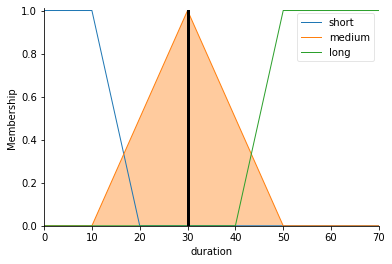

In [40]:
print('Duration: ',dur.output['duration'])
duration.view(sim=dur)